# Forbes Richest Athletes 

<img src="https://i.ytimg.com/vi/NPOdcCfyUnw/maxresdefault.jpg" width="700" height="500" />

**Data Dictionary**
1. Name: Name of the athlete.
2. Nationality: Name of the country the athlete belongs to.
3. Current Rank: Rank in the corresponding Year.
4. Previous Year Rank: Rank in in the preceding year.
5. Sport: Name of the sports that athlete played that year.
6. Year: Current year of ranking.
7. earnings ( million) : Earnings of the athlete in millions in the corresponding year. 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("deep")
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
df = pd.read_csv("6.Forbes+Richest+Athletes+1990-2019.csv")

In [3]:
df.head()

,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,Mike Tyson,USA,1,Not Listed,Boxing,1990,28.6
1,Buster Douglas,USA,2,Not Listed,Boxing,1990,26.0
2,Sugar Ray Leonard,USA,3,Not Listed,Boxing,1990,13.0
3,Ayrton Senna,Brazil,4,Not Listed,Auto Racing,1990,10.0
4,Alain Prost,France,5,Not Listed,Auto Racing,1990,9.0


In [4]:
df.isnull().sum()

Name                    0
Nationality             0
Current Rank            0
Previous Year Rank      0
Sport                   0
Year                    0
earnings ($ million)    0
dtype: int64

In [5]:
df.shape

(291, 7)

### Q1. Atheletes from which country have been listed most number of times in the Forbes Richest Athletes from 1990 to 2019?
[Hint: use countplot]

In [6]:
df.head()

,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,Mike Tyson,USA,1,Not Listed,Boxing,1990,28.6
1,Buster Douglas,USA,2,Not Listed,Boxing,1990,26.0
2,Sugar Ray Leonard,USA,3,Not Listed,Boxing,1990,13.0
3,Ayrton Senna,Brazil,4,Not Listed,Auto Racing,1990,10.0
4,Alain Prost,France,5,Not Listed,Auto Racing,1990,9.0


In [7]:
df['Nationality'].value_counts()

USA                 200
UK                   13
Germany              13
Switzerland          11
Portugal              9
Brazil                8
Argentina             8
Canada                6
Italy                 4
Finland               3
France                3
Philippines           3
Russia                1
Australia             1
Dominican             1
Austria               1
Filipino              1
Spain                 1
Serbia                1
Northern Ireland      1
Ireland               1
Mexico                1
Name: Nationality, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Nationality'>

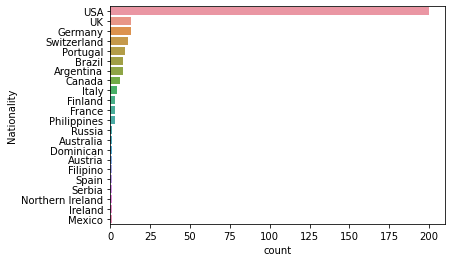

In [8]:
sns.countplot(y=df['Nationality'],order=df['Nationality'].value_counts().index)

### Q2. Make a plot visualizing year wise top earning (rank-1) athletes. In which year the rank 1 athlete earned the most? Which was the athlete who earned the most and what sport did he play? How much did the athlete earn?
[hint : use barplot]

In [13]:
rank1=df[df['Current Rank']==1]

In [14]:
rank1[rank1['earnings ($ million)']==rank1['earnings ($ million)'].max()]

,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
241,Floyd Mayweather,USA,1,1,Boxing,2015,300.0


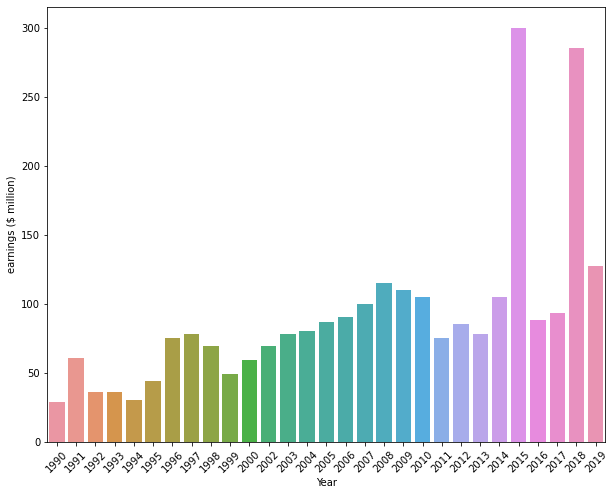

In [15]:
rank1=df[df['Current Rank']==1]
plt.figure(figsize=(10,8))
sns.barplot(x=rank1['Year'],y=rank1['earnings ($ million)'])
plt.xticks(rotation=45)
plt.show()

### Q3. Which athlete has been most frequently ranked number 1 from 1990 to 2019? 
[Hint : use piechart]

In [16]:
rank1.head()

,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,Mike Tyson,USA,1,Not Listed,Boxing,1990,28.6
10,Evander Holyfield,USA,1,8,Boxing,1991,60.5
20,Michael Jordan,USA,1,3,Basketball,1992,35.9
30,Michael Jordan,USA,1,1,Basketball,1993,36.0
40,Michael Jordan,USA,1,1,Basketball,1994,30.0


In [17]:
label=rank1['Name'].value_counts().index
label

Index(['Tiger Woods', 'Michael Jordan', 'Floyd Mayweather', 'Mike Tyson',
       'Michael Schumacher', 'Cristiano Ronaldo', 'Evander Holyfield',
       'Lionel Messi'],
      dtype='object')

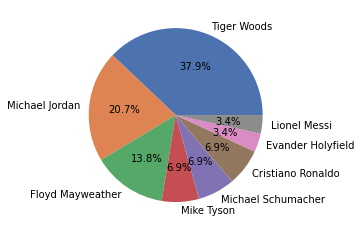

In [18]:
plt.pie(rank1['Name'].value_counts(),labels=label,autopct='%1.1f%%');

### Q4. Players from which 2 sports have been listed least number of times in the Forbes RIchest Athletes List?
[Hint : Use swarmplot]

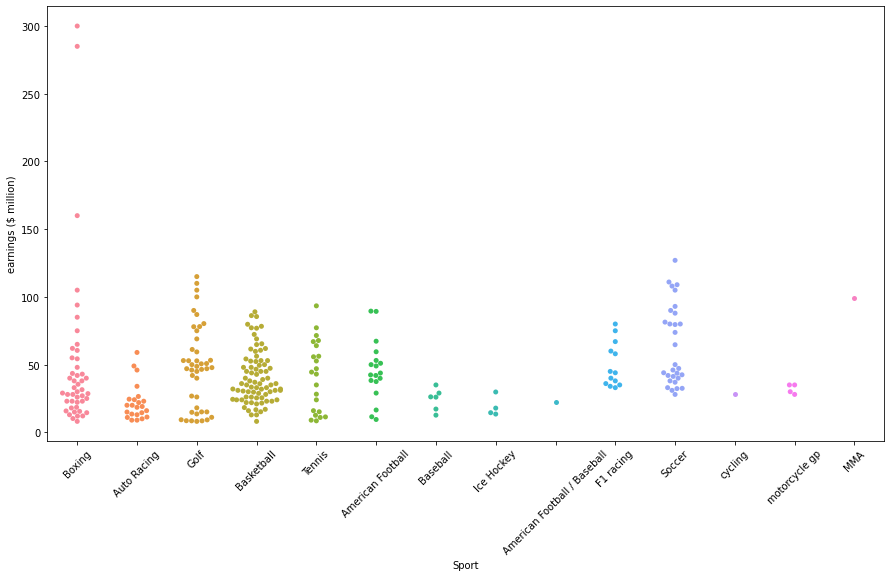

In [21]:
plt.figure(figsize=(15,8))
sns.swarmplot(x=df['Sport'],y=df['earnings ($ million)'])
plt.xticks(rotation=45)
plt.show()

### Q5. Discuss the relationship between Current rank and earnings with the help of a suitable plot.
[hint : use regplot]

<AxesSubplot:xlabel='Current Rank', ylabel='earnings ($ million)'>

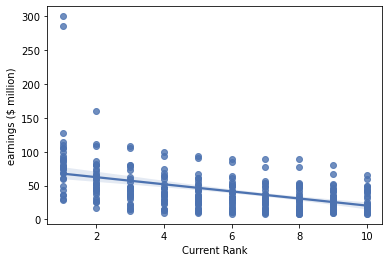

In [22]:
sns.regplot(df['Current Rank'],df['earnings ($ million)'])

### Q6. Which three sports have the highest spread in terms of earnings (highest IQR)?
[Hint : use boxplot]

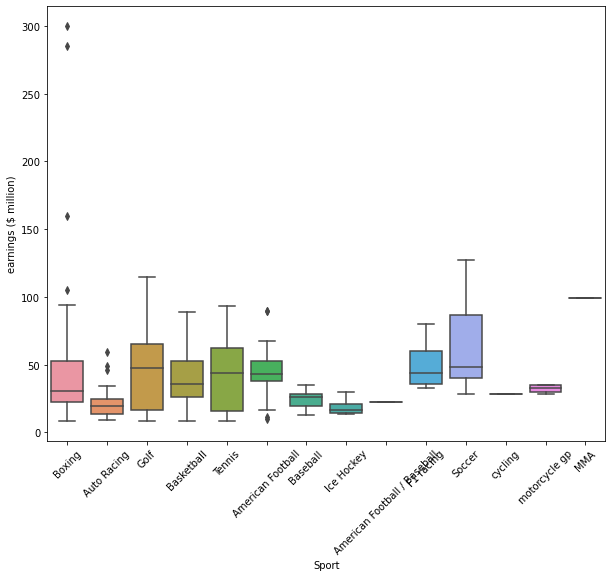

In [31]:
plt.figure(figsize=(10,8))
sns.boxplot(x=df['Sport'],y=df['earnings ($ million)'])
plt.xticks(rotation=45)
plt.show()

### Q7. Show a trend in the positions at which Tiger Woods has appeared in the Forbes Richest Athletes list overs the years.
[Hint : Use lineplot]

<AxesSubplot:xlabel='Year', ylabel='Current Rank'>

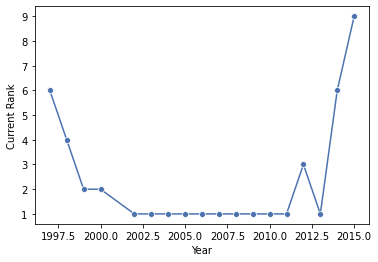

In [44]:
tiger=df[df['Name']=='Tiger Woods']
sns.lineplot(tiger['Year'],df['Current Rank'],marker='o')

### Q8. Comment on the trend of the earnings of Tiger Woods overs the years.
[Hint : use lineplot]

<AxesSubplot:xlabel='Year', ylabel='earnings ($ million)'>

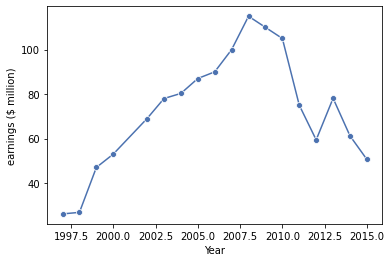

In [42]:
sns.lineplot(tiger['Year'],tiger['earnings ($ million)'],marker='o')

### Q9. Display the distribution of the earnings of Tiger Woods. Comment on how the distribution looks like and interpret some insights from the plot.
[Hint : Use distplot]

<AxesSubplot:xlabel='earnings ($ million)', ylabel='Density'>

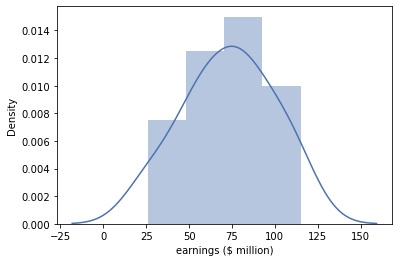

In [46]:
sns.distplot(tiger['earnings ($ million)'])

### Q10. Has the earnings of the richest athletes increased over the period of 30 years? Discuss the correlation between year and earnings.
[Hint : Use heatmap/scatterplot]

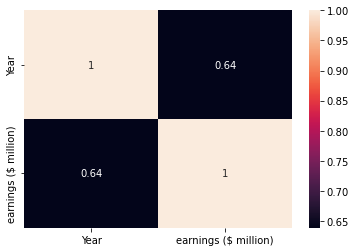

In [48]:
corr=df[['Year','earnings ($ million)']].corr()
sns.heatmap(corr,annot=True)
plt.show()

<AxesSubplot:xlabel='Year', ylabel='earnings ($ million)'>

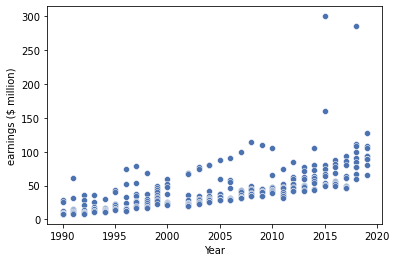

In [49]:
sns.scatterplot(df['Year'],df['earnings ($ million)'])

### Q-11 Display the earnings trend over the years.
[Hint: use lineplot(), estimator = np.mean]

<AxesSubplot:xlabel='Year', ylabel='earnings ($ million)'>

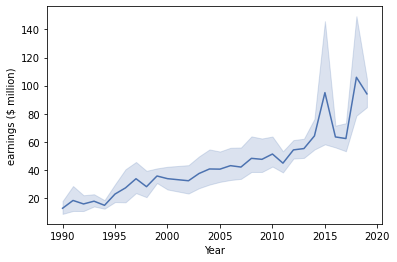

In [55]:
sns.lineplot(df['Year'],df['earnings ($ million)'],estimator=np.mean)

                                            **Happy Learning**